# Convert to netcdf

In [1]:
import surfradpy.radflux2netcdf as srpradflux

In [2]:
reload(srpradflux)

<module 'surfradpy.radflux2netcdf' from '/home/hagen/prog/SURFRAD/surfradpy/radflux2netcdf.py'>

In [3]:
Process 

NameError: name 'Process' is not defined

In [5]:
con = srpradflux.Convert(
            path2fld_in='/home/hagen/data/grad/surfrad/radflux/',
            path2fld_out='/home/hagen/data/grad/surfrad/radflux_nc/v{version}/',
            sites=['tbl'],#, 'dra', 'fpk', 'gwn', 'psu', 'sxf', 'bon'],
            file_extension = 'lw1',
            start=None,
            overwrite=False,
            reporter=None,
        )

In [6]:
con.workplan

checking: /home/hagen/data/grad/surfrad/radflux/tbl


,p2f_in,site,p2f_out
date,,,
2020-08-22,/home/hagen/data/grad/surfrad/radflux/tbl/2020...,tbl,/home/hagen/data/grad/surfrad/radflux_nc/v1.0/...
2020-08-23,/home/hagen/data/grad/surfrad/radflux/tbl/2020...,tbl,/home/hagen/data/grad/surfrad/radflux_nc/v1.0/...
2020-08-24,/home/hagen/data/grad/surfrad/radflux/tbl/2020...,tbl,/home/hagen/data/grad/surfrad/radflux_nc/v1.0/...
2020-08-25,/home/hagen/data/grad/surfrad/radflux/tbl/2020...,tbl,/home/hagen/data/grad/surfrad/radflux_nc/v1.0/...
2020-08-26,/home/hagen/data/grad/surfrad/radflux/tbl/2020...,tbl,/home/hagen/data/grad/surfrad/radflux_nc/v1.0/...
...,...,...,...
2025-06-18,/home/hagen/data/grad/surfrad/radflux/tbl/2025...,tbl,/home/hagen/data/grad/surfrad/radflux_nc/v1.0/...
2025-06-19,/home/hagen/data/grad/surfrad/radflux/tbl/2025...,tbl,/home/hagen/data/grad/surfrad/radflux_nc/v1.0/...
2025-06-20,/home/hagen/data/grad/surfrad/radflux/tbl/2025...,tbl,/home/hagen/data/grad/surfrad/radflux_nc/v1.0/...


In [26]:
con.process()

# resample to reduce load

In [1]:
p2fld = pl.Path('/home/hagen/data/grad/surfrad/radflux_nc/v1.0/tbl/2018')
p2fld_out = pl.Path('/home/hagen/data/grad/surfrad_avg10min/radflux_nc/v1.0/tbl/2018')

In [2]:
wp = pd.DataFrame(p2fld.glob('*'), columns=['p2f_in',])

In [3]:
wp.index = wp.apply(lambda row: pd.to_datetime(row.p2f_in.name.split('.')[-2]), axis = 1)
wp.sort_index(inplace=True)

In [4]:
def fn_out(row):
    fns = row.p2f_in.name.split('.')
    fns[-2] = f'avg10min.{fns[-2][:6]}'    
    return p2fld_out.joinpath('.'.join(fns))

wp['p2f_out'] = wp.apply(fn_out, axis = 1)

In [5]:
wp = wp[~(wp.apply(lambda row: row.p2f_out.is_file(), axis = 1))]

In [ ]:
for p2f_out, grp in wp.groupby('p2f_out'):
    print('.'
    if p2f_out.is_file():
        continue

    ds = xr.open_mfdataset(grp.p2f_in)
    dsm = ds.resample({'time':'10min'}).mean()
    p2f_out.parent.mkdir(parents=True, exist_ok=True)
    dsm.to_netcdf(p2f_out)

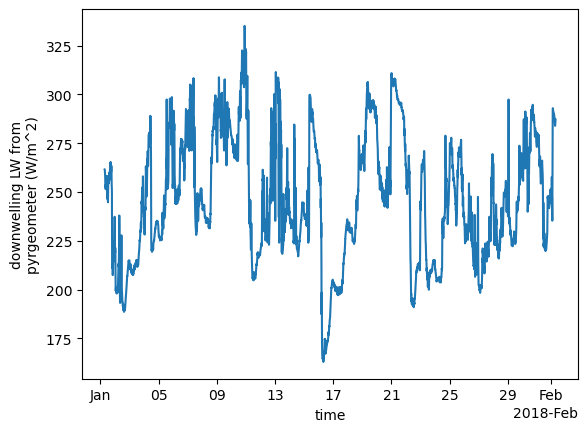

In [12]:
dsm.longwave_down.plot()

In [37]:
for idx, row in wp.iterrows():
    break

In [38]:
ds = xr.open_dataset(row.p2f_in)

In [40]:
ds

<xarray.Dataset> Size: 484kB
Dimensions:                                    (time: 1440)
Coordinates:
  * time                                       (time) datetime64[ns] 12kB 201...
Data variables: (12/41)
    distance_from_sun                          (time) float64 12kB ...
    shortwave_down_best_estimate               (time) float64 12kB ...
    shortwave_down_clear_sky_estimate          (time) float64 12kB ...
    longwave_down                              (time) float64 12kB ...
    longwave_down_clear_sky_estimate           (time) float64 12kB ...
    shortwave_up                               (time) float64 12kB ...
    ...                                         ...
    lwdtc                                      (time) float64 12kB ...
    lwdtd                                      (time) float64 12kB ...
    lwutc                                      (time) float64 12kB ...
    lwutd                                      (time) float64 12kB ...
    solar_zenith_angle                         (time) float64 12kB ...
    time_local                                 (time) datetime64[ns] 12kB ...

In [41]:
dsm = ds.resample({'time':'10min'}).mean()

In [ ]:
dsm.to_netcdf(row.p2f_out)

In [2]:
ds = xr.open_mfdataset(p2fld.glob('*'))

In [3]:
rs = ds.resample(time = '10min')

In [ ]:
dsm = rs.mean()